<a href="https://colab.research.google.com/github/Tathagt/AI-ML-Project/blob/main/Copy_of_Vehicle_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier


In [ ]:
headers = [
    'COMPACTNESS', 'CIRCULARITY', 'DISTANCE_CIRCULARITY', 'RADIUS_RATIO',
    'PR.AXIS_ASPECT_RATIO', 'MAX.LENGTH_ASPECT_RATIO', 'SCATTER_RATIO',
    'ELONGATEDNESS', 'PR.AXIS_RECTANGULARITY', 'MAX.LENGTH_RECTANGULARITY',
    'SCALED_VARIANCE_MAJOR', 'SCALED_VARIANCE_MINOR', 'SCALED_RADIUS_OF_GYRATION',
    'SKEWNESS_ABOUT_MAJOR', 'SKEWNESS_ABOUT_MINOR', 'KURTOSIS_ABOUT_MAJOR',
    'KURTOSIS_ABOUT_MINOR', 'HOLLOWS_RATIO', 'Class'
]
print("headers\n")


headers



# **DATA-PREPROCESSING**

In [ ]:
df = pd.read_csv("data.csv.txt",names=headers,header=None)
df


,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO,Class
0,NaN,48.0,83,178.0,72.0,10,162.0,42,20.0,159.0,NaN,379,184.0,70.0,6.0,16,187.0,197,van
1,NaN,41.0,84,141.0,57.0,9,149.0,45,19.0,143.0,170.0,330,158.0,NaN,9.0,14,189.0,199,van
2,NaN,NaN,106,209.0,66.0,10,207.0,32,23.0,158.0,223.0,635,220.0,73.0,14.0,9,188.0,196,saab
3,93.0,41.0,82,159.0,63.0,9,144.0,46,19.0,NaN,160.0,309,127.0,63.0,6.0,10,199.0,207,van
4,NaN,44.0,70,205.0,103.0,52,149.0,45,19.0,144.0,241.0,325,188.0,127.0,9.0,11,180.0,183,bus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93.0,39.0,87,183.0,64.0,8,169.0,40,20.0,134.0,200.0,422,149.0,72.0,7.0,25,188.0,195,saab
842,89.0,46.0,84,163.0,66.0,11,159.0,43,20.0,159.0,173.0,368,176.0,72.0,1.0,20,186.0,197,van
843,106.0,54.0,101,222.0,67.0,12,222.0,30,25.0,173.0,228.0,721,200.0,70.0,3.0,4,187.0,201,saab
844,86.0,36.0,78,146.0,58.0,7,135.0,50,18.0,124.0,155.0,270,148.0,66.0,0.0,25,190.0,195,saab


In [ ]:
df.head(5)

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO,Class
0,NaN,48.0,83,178.0,72.0,10,162.0,42,20.0,159.0,NaN,379,184.0,70.0,6.0,16,187.0,197,van
1,NaN,41.0,84,141.0,57.0,9,149.0,45,19.0,143.0,170.0,330,158.0,NaN,9.0,14,189.0,199,van
2,NaN,NaN,106,209.0,66.0,10,207.0,32,23.0,158.0,223.0,635,220.0,73.0,14.0,9,188.0,196,saab
3,93.0,41.0,82,159.0,63.0,9,144.0,46,19.0,NaN,160.0,309,127.0,63.0,6.0,10,199.0,207,van
4,NaN,44.0,70,205.0,103.0,52,149.0,45,19.0,144.0,241.0,325,188.0,127.0,9.0,11,180.0,183,bus


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   COMPACTNESS                842 non-null    float64
 1   CIRCULARITY                845 non-null    float64
 2   DISTANCE_CIRCULARITY       846 non-null    int64  
 3   RADIUS_RATIO               845 non-null    float64
 4   PR.AXIS_ASPECT_RATIO       844 non-null    float64
 5   MAX.LENGTH_ASPECT_RATIO    846 non-null    int64  
 6   SCATTER_RATIO              845 non-null    float64
 7   ELONGATEDNESS              846 non-null    int64  
 8   PR.AXIS_RECTANGULARITY     845 non-null    float64
 9   MAX.LENGTH_RECTANGULARITY  845 non-null    float64
 10  SCALED_VARIANCE_MAJOR      845 non-null    float64
 11  SCALED_VARIANCE_MINOR      846 non-null    int64  
 12  SCALED_RADIUS_OF_GYRATION  844 non-null    float64
 13  SKEWNESS_ABOUT_MAJOR       845 non-null    float64

In [ ]:
df.isnull()

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO,Class
0,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
2,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
842,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
843,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
844,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
missing_data = df.isnull()
missing_data

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO,Class
0,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
2,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
842,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
843,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
844,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
missing_data = df.isnull()
for column in headers :
  print(column)
  print(missing_data[column].value_counts())
  print("")
  # Display missing data count for each column

COMPACTNESS
COMPACTNESS
False    842
True       4
Name: count, dtype: int64

CIRCULARITY
CIRCULARITY
False    845
True       1
Name: count, dtype: int64

DISTANCE_CIRCULARITY
DISTANCE_CIRCULARITY
False    846
Name: count, dtype: int64

RADIUS_RATIO
RADIUS_RATIO
False    845
True       1
Name: count, dtype: int64

PR.AXIS_ASPECT_RATIO
PR.AXIS_ASPECT_RATIO
False    844
True       2
Name: count, dtype: int64

MAX.LENGTH_ASPECT_RATIO
MAX.LENGTH_ASPECT_RATIO
False    846
Name: count, dtype: int64

SCATTER_RATIO
SCATTER_RATIO
False    845
True       1
Name: count, dtype: int64

ELONGATEDNESS
ELONGATEDNESS
False    846
Name: count, dtype: int64

PR.AXIS_RECTANGULARITY
PR.AXIS_RECTANGULARITY
False    845
True       1
Name: count, dtype: int64

MAX.LENGTH_RECTANGULARITY
MAX.LENGTH_RECTANGULARITY
False    845
True       1
Name: count, dtype: int64

SCALED_VARIANCE_MAJOR
SCALED_VARIANCE_MAJOR
False    845
True       1
Name: count, dtype: int64

SCALED_VARIANCE_MINOR
SCALED_VARIANCE_MINOR
False   

In [ ]:
 from sklearn.impute import SimpleImputer
 imputer_most_freq = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
 df.iloc[:,:] = imputer_most_freq.fit_transform(df.iloc[:,:])
# Impute missing values with the most frequent value in each column

In [ ]:
df.info()
# Display data info after imputation

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   COMPACTNESS                846 non-null    float64
 1   CIRCULARITY                846 non-null    float64
 2   DISTANCE_CIRCULARITY       846 non-null    int64  
 3   RADIUS_RATIO               846 non-null    float64
 4   PR.AXIS_ASPECT_RATIO       846 non-null    float64
 5   MAX.LENGTH_ASPECT_RATIO    846 non-null    int64  
 6   SCATTER_RATIO              846 non-null    float64
 7   ELONGATEDNESS              846 non-null    int64  
 8   PR.AXIS_RECTANGULARITY     846 non-null    float64
 9   MAX.LENGTH_RECTANGULARITY  846 non-null    float64
 10  SCALED_VARIANCE_MAJOR      846 non-null    float64
 11  SCALED_VARIANCE_MINOR      846 non-null    int64  
 12  SCALED_RADIUS_OF_GYRATION  846 non-null    float64
 13  SKEWNESS_ABOUT_MAJOR       846 non-null    float64

In [ ]:
X = df.drop(columns=['Class'])
y = df['Class']

# **LINEAR REGRESSION**

In [ ]:
y = pd.factorize(y)[0]

In [ ]:
def linear_regression_single_feature(feature):
    X_feature = X[[feature]]
    X_train, X_test, y_train, y_test = train_test_split(X_feature, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return mse, r2


In [ ]:
# Generate predictions using the fitted model
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

Mean Squared Error (MSE): 0.6140073509555315
R² Score: 0.42491533437208784


In [ ]:
results = {}
for feature in X.columns:
    mse, r2 = linear_regression_single_feature(feature)
    results[feature] = {'Mean Squared Error': mse, 'R² Score': r2}

In [ ]:
for feature, metrics in results.items():
    print(f"Feature: {feature}")
    print(f"  Mean Squared Error: {metrics['Mean Squared Error']}")
    print(f"  R² Score: {metrics['R² Score']}")
    print("")

Feature: COMPACTNESS
  Mean Squared Error: 1.059983929692513
  R² Score: 0.007209762506040218

Feature: CIRCULARITY
  Mean Squared Error: 0.980679946609922
  R² Score: 0.08148656802480103

Feature: DISTANCE_CIRCULARITY
  Mean Squared Error: 0.9866519439302676
  R² Score: 0.07589314300023564

Feature: RADIUS_RATIO
  Mean Squared Error: 0.9569032724367635
  R² Score: 0.10375600941721341

Feature: PR.AXIS_ASPECT_RATIO
  Mean Squared Error: 1.083463201996329
  R² Score: -0.014781129689328099

Feature: MAX.LENGTH_ASPECT_RATIO
  Mean Squared Error: 1.0819276495770764
  R² Score: -0.013342917836968615

Feature: SCATTER_RATIO
  Mean Squared Error: 0.8962702947939082
  R² Score: 0.16054538762172854

Feature: ELONGATEDNESS
  Mean Squared Error: 0.855810540946647
  R² Score: 0.19844034763552965

Feature: PR.AXIS_RECTANGULARITY
  Mean Squared Error: 0.9192843719925742
  R² Score: 0.13899020123848227

Feature: MAX.LENGTH_RECTANGULARITY
  Mean Squared Error: 1.046863411914104
  R² Score: 0.019498554

In [ ]:
mse_values = [metrics['Mean Squared Error'] for metrics in results.values()]
r2_values = [metrics['R² Score'] for metrics in results.values()]

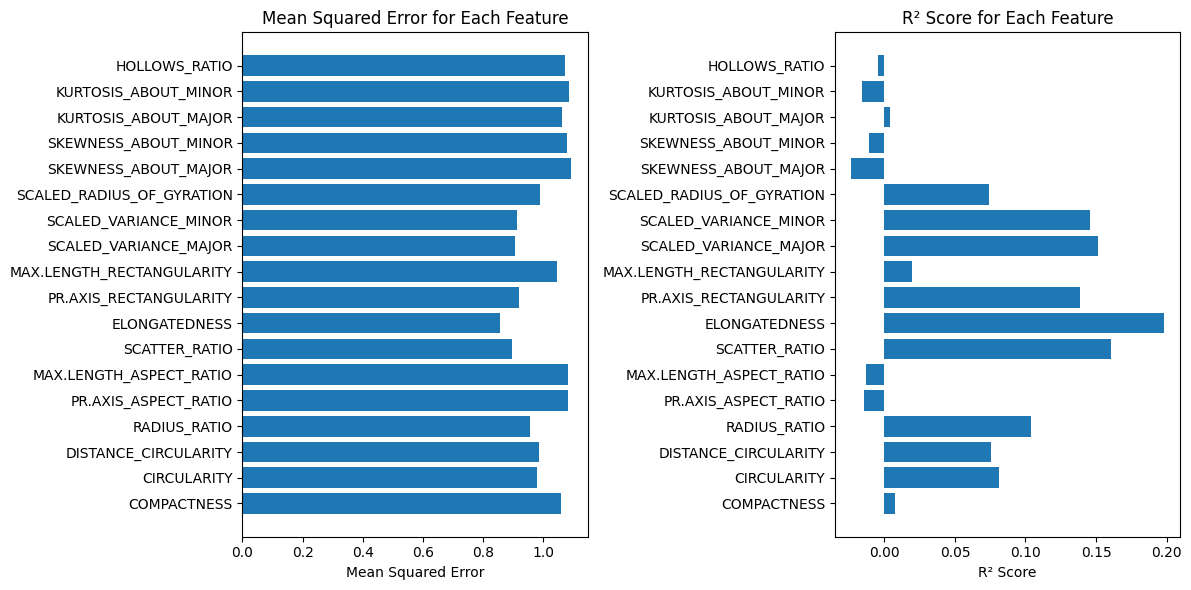

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.barh(list(results.keys()), mse_values)
plt.xlabel('Mean Squared Error')
plt.title('Mean Squared Error for Each Feature')

plt.subplot(1, 2, 2)
plt.barh(list(results.keys()), r2_values)
plt.xlabel('R² Score')
plt.title('R² Score for Each Feature')

plt.tight_layout()
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

Mean Squared Error (MSE): 0.6140073509555315
R² Score: 0.42491533437208784


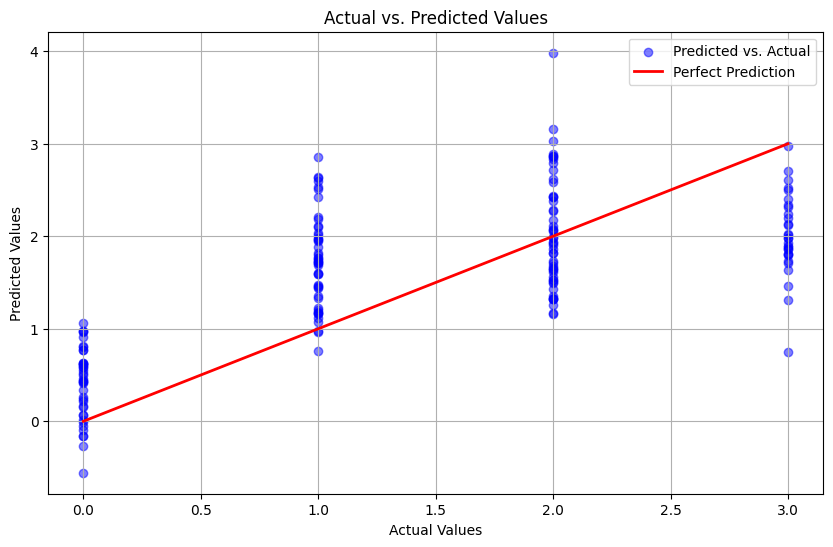

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Predicted vs. Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

# **CROSS-VALIDATION**

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
# Set up K-Fold Cross-Validation

In [ ]:
mse_scores = []
r2_scores = []
# Lists to store the results

In [ ]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    mse_scores.append(mse)
    r2_scores.append(r2)
# Perform Cross-Validation

In [ ]:
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)
mean_r2 = np.mean(r2_scores)
std_r2 = np.std(r2_scores)

In [ ]:
print(f"Mean MSE: {mean_mse} ± {std_mse}")
print(f"Mean R²: {mean_r2} ± {std_r2}")

Mean MSE: 0.6813992728081493 ± 0.06467281033747634
Mean R²: 0.43650727122497185 ± 0.04243334393296136


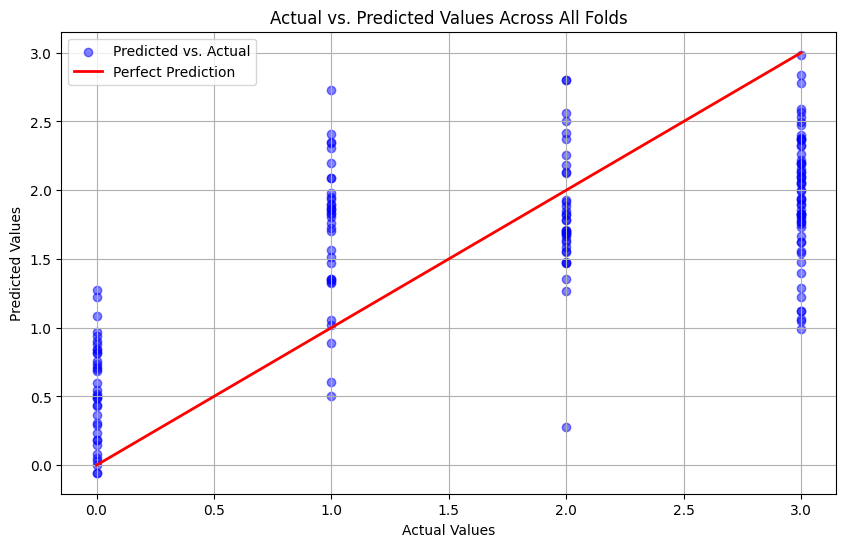

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Predicted vs. Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values Across All Folds')
plt.legend()
plt.grid(True)
plt.show()

# **Performance** **Metrics**

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(y_test - y_pred))
n = len(y_test)
p = X_test.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

In [ ]:
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")
print(f"Adjusted R² Score: {adj_r2}")

Mean Squared Error (MSE): 0.7572362619729456
Root Mean Squared Error (RMSE): 0.8701932325483493
Mean Absolute Error (MAE): 0.7353926129786242
R² Score: 0.4444820487462935
Adjusted R² Score: 0.37781989459584864


# **Logistic** **Regression**

In [ ]:
log_reg = LogisticRegression()

In [ ]:
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = log_reg.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6686390532544378


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

Confusion Matrix:
[[33  1  3  0]
 [ 0 21  2 12]
 [ 0  0 33  3]
 [ 2 28  5 26]]


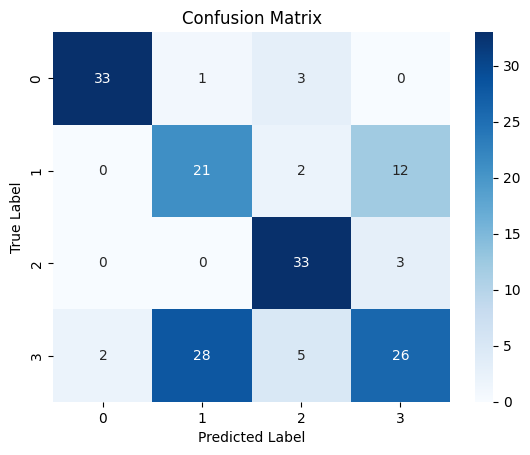

In [ ]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
class_report = classification_report(y_test, y_pred)
print(f"Classification Report:\n{class_report}")

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.89      0.92        37
           1       0.42      0.60      0.49        35
           2       0.77      0.92      0.84        36
           3       0.63      0.43      0.51        61

    accuracy                           0.67       169
   macro avg       0.69      0.71      0.69       169
weighted avg       0.69      0.67      0.66       169



NAIVE BAYES

In [ ]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))
print(f'Naive Bayes Accuracy: {accuracy_score(y_test, y_pred_nb)}')



Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.39      0.84      0.53        37
           1       0.38      0.54      0.45        35
           2       0.67      0.22      0.33        36
           3       0.70      0.31      0.43        61

    accuracy                           0.46       169
   macro avg       0.53      0.48      0.44       169
weighted avg       0.56      0.46      0.44       169

Naive Bayes Accuracy: 0.4556213017751479


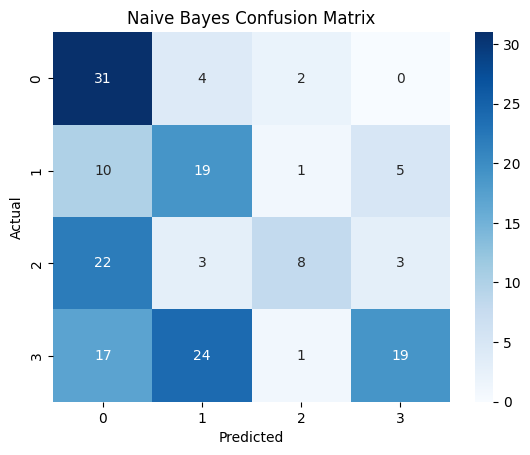

In [ ]:
nb_conf_matrix = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(nb_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


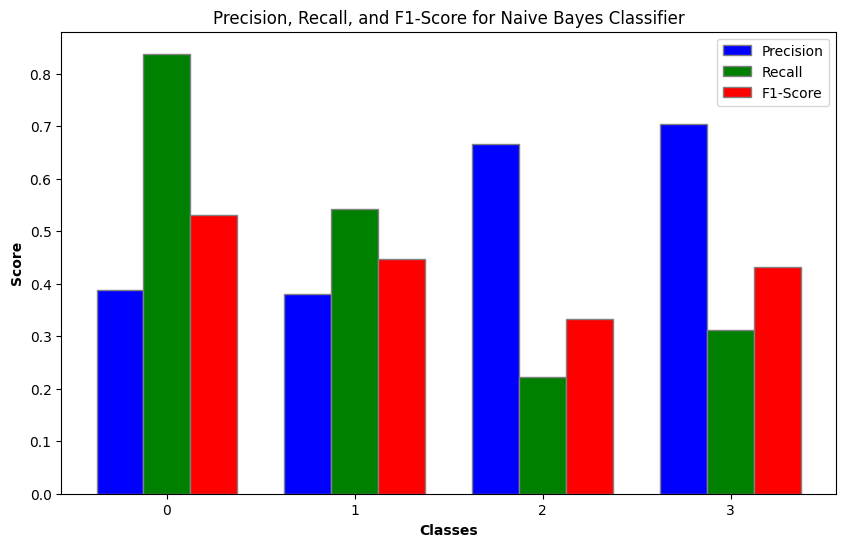

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

# Get the classification report as a dictionary
report = classification_report(y_test, y_pred_nb, output_dict=True)

# Extract precision, recall, and f1-score for each class
precision = [report[str(i)]['precision'] for i in range(len(report)-3)]
recall = [report[str(i)]['recall'] for i in range(len(report)-3)]
f1_score = [report[str(i)]['f1-score'] for i in range(len(report)-3)]

# Define the labels (class names)
classes = [str(i) for i in range(len(report)-3)]

# Create the bar width and positions for the bars
bar_width = 0.25
r1 = np.arange(len(classes))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Plot the bar chart
plt.figure(figsize=(10,6))
plt.bar(r1, precision, color='b', width=bar_width, edgecolor='grey', label='Precision')
plt.bar(r2, recall, color='g', width=bar_width, edgecolor='grey', label='Recall')
plt.bar(r3, f1_score, color='r', width=bar_width, edgecolor='grey', label='F1-Score')

# Add labels
plt.xlabel('Classes', fontweight='bold')
plt.ylabel('Score', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(classes))], classes)

# Add legend
plt.legend()

# Show the plot
plt.title("Precision, Recall, and F1-Score for Naive Bayes Classifier")
plt.show()


SVM

In [ ]:
### Support Vector Machine Classifier
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))
print(f'SVM Accuracy: {accuracy_score(y_test, y_pred_svm)}')


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90        37
           1       0.39      0.54      0.45        35
           2       1.00      0.83      0.91        36
           3       0.65      0.52      0.58        61

    accuracy                           0.69       169
   macro avg       0.72      0.71      0.71       169
weighted avg       0.72      0.69      0.69       169

SVM Accuracy: 0.6863905325443787


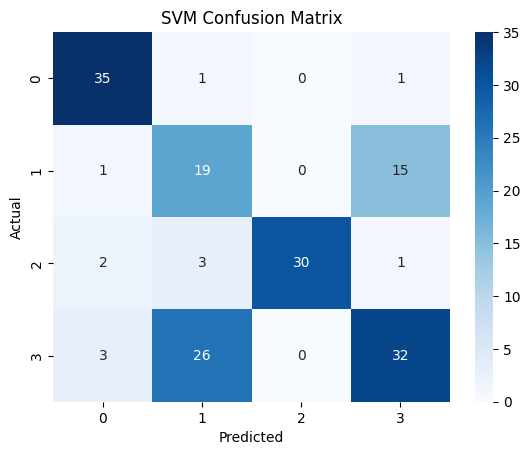

In [ ]:
svm_conf_matrix = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(svm_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


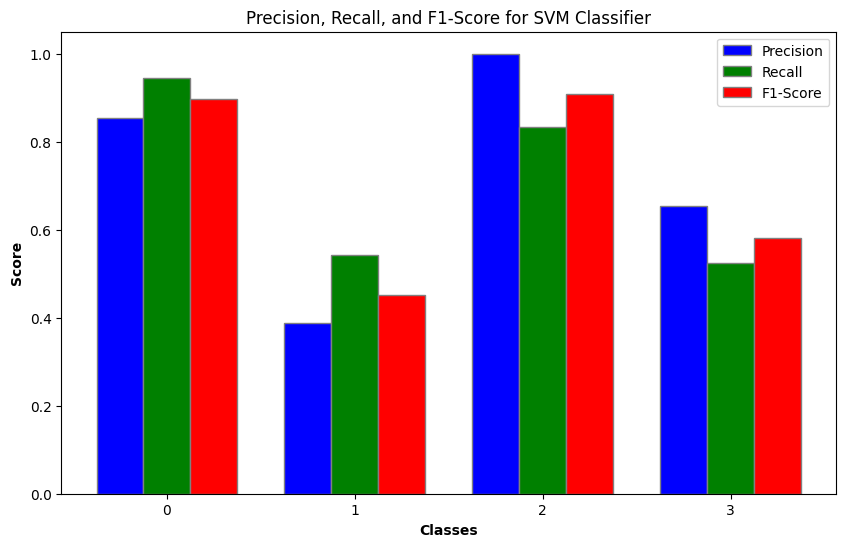

In [ ]:
from sklearn.metrics import classification_report

# Assuming y_pred_svm is the prediction from your SVM model
# Get the classification report as a dictionary for SVM
svm_report = classification_report(y_test, y_pred_svm, output_dict=True)

# Extract precision, recall, and f1-score for each class
precision_svm = [svm_report[str(i)]['precision'] for i in range(len(svm_report)-3)]
recall_svm = [svm_report[str(i)]['recall'] for i in range(len(svm_report)-3)]
f1_score_svm = [svm_report[str(i)]['f1-score'] for i in range(len(svm_report)-3)]

# Define the labels (class names)
classes_svm = [str(i) for i in range(len(svm_report)-3)]

# Create the bar width and positions for the bars
bar_width = 0.25
r1 = np.arange(len(classes_svm))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Plot the bar chart for SVM
plt.figure(figsize=(10,6))
plt.bar(r1, precision_svm, color='b', width=bar_width, edgecolor='grey', label='Precision')
plt.bar(r2, recall_svm, color='g', width=bar_width, edgecolor='grey', label='Recall')
plt.bar(r3, f1_score_svm, color='r', width=bar_width, edgecolor='grey', label='F1-Score')

# Add labels
plt.xlabel('Classes', fontweight='bold')
plt.ylabel('Score', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(classes_svm))], classes_svm)

# Add legend
plt.legend()

# Show the plot
plt.title("Precision, Recall, and F1-Score for SVM Classifier")
plt.show()


3. Principal Component Analysis (PCA)


In [ ]:
# PCA function
def pca(X, n_components):
    # Center the data
    X_meaned = X - np.mean(X, axis=0)

    # Compute the covariance matrix
    cov_matrix = np.cov(X_meaned, rowvar=False)

    # Compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

    # Sort eigenvalues and eigenvectors
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    # Select the top n_components eigenvectors
    eigenvectors_subset = eigenvectors[:, :n_components]

    # Transform the data
    X_pca = np.dot(X_meaned, eigenvectors_subset)

    return X_pca



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.3669


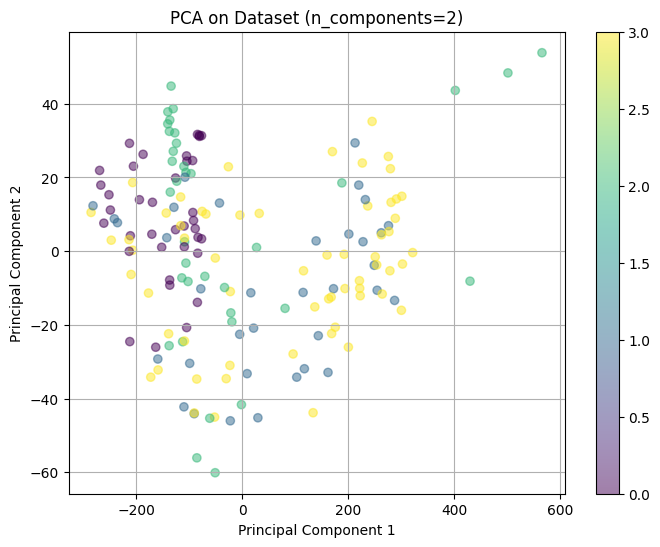

In [ ]:
n_components = 2
X_train_pca = pca(X_train, n_components)
X_test_pca = pca(X_test, n_components)

# Train a classifier (Logistic Regression) on the reduced data
classifier = LogisticRegression()
classifier.fit(X_train_pca, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_test_pca)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Plotting PCA results
plt.figure(figsize=(8, 6))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='viridis', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'PCA on Dataset (n_components={n_components})')
plt.colorbar()
plt.grid(True)
plt.show()
